# Exemplo de modelo de Regressão Linear usando sckikit-learn 
Este é um exemplo simples demonstrando como é possível e incrivelmente simples criar um modelo de regressão linear usando o scikit-learn. 
Neste notebook nós utilizaremos dados baseados em uma onda seno com ruído para simular dados reais, treinaremos nosso modelo e avaliaremos os resultados

## Objetivos
1. Visualizar os dado em um gráfico
2. Usar Pipeline e GridSearch para achar os melhores parametros para a nossa base de dados
3. Usar Polynomial Features para aumentar a complexidade do nosso modelo 
4. Visualizar os dados preditos

instalando modulos necessários 

In [195]:
%pip install scikit-learn numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


importando os módulos que vamos usar 

In [196]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

Criando nossos dados


In [197]:
x = np.linspace(0, 10, 500).reshape(-1,1)
y = np.sin(x).ravel() + (.15 * np.random.randn(500))

Visualizando os dados gerados

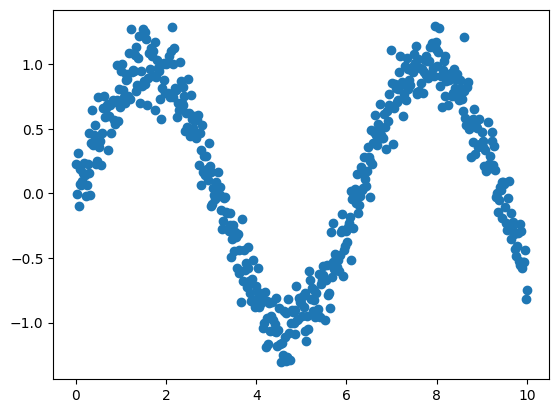

In [198]:
plt.scatter(x,y)
plt.show()

Dividindo os dados em teste e treino

In [199]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size = .2, random_state=0)

Criando a pipeline e o grid search para cuidarem dos hiperparâmetros automaticamente

In [200]:
pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('poly_features', PolynomialFeatures()),
  ('ridge_regression', Ridge())
])

param_grid = {
  'poly_features__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
  'ridge_regression__alpha': [0.001, .01, .1, 1, 10, 100]
}

treinando os modelos e elegendo o melhor 

In [201]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')

grid_search.fit(xtr, ytr)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly_features', PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'poly_features__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15],
                         'ridge_regression__alpha': [0.001, 0.01, 0.1, 1, 10,
                                                     100]},
             scoring='r2')

In [202]:
grid_search.best_params_

{'poly_features__degree': 8, 'ridge_regression__alpha': 0.001}

Avaliando o modelo

In [203]:
yhat = grid_search.predict(xte)

r2 = r2_score(yte, yhat)
print(r2)

0.9637801617944988


Visualizando os dados

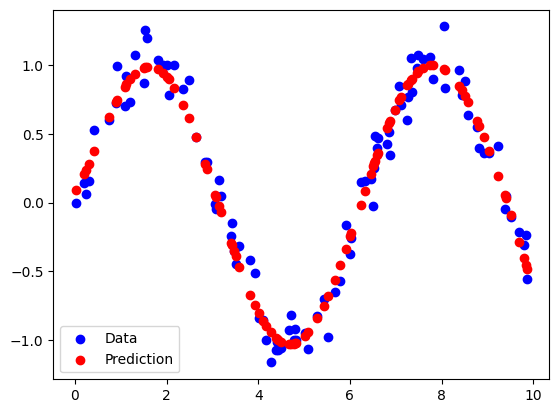

In [205]:
plt.scatter(xte, yte, color='blue', label='Data')

plt.scatter(xte, yhat, color='red', label='Prediction')
plt.legend()
plt.show()

## Conclusão

Podemos observar que o modelo tem dificuldade em se encaixar com os dados conforme a variabilidade dos dados aumenta. 